In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans, MeanShift, estimate_bandwidth, SpectralClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle
%matplotlib inline

### How can I identify similar Marathon performances?

In [27]:
df = pd.read_csv('results.csv')
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [28]:
# Drop row in city where there's a null value
df = df.dropna(subset=['city'])

# Replace values that represent null
df = df.replace('-', np.nan)

# Convert types to numeric
df[['10k', '25k', '35k', '30k', '5k', 'half', '20k', '40k']] = df[['10k', '25k', '35k', '30k', '5k', 'half', '20k', '40k']].apply(pd.to_numeric)

# Impute null with means
df = df.fillna(df.mean())

In [29]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [32]:
# One-Hot encoding
df['gender'] = pd.get_dummies(df.gender, drop_first=True)
#df['citizen'] = pd.get_dummies(df.ctz.notna(), drop_first=True)
#df['american'] = pd.get_dummies(df.state.notna(), drop_first=True)

# Create features
features = df.drop(['state', 'ctz', 'name', 'city', 'country', 'bib', 'gender', 'division', 'genderdiv', 'overall', 'age', 'official'], 1)

# Define the features and the outcome.
X = features.iloc[:, :9]
y = features.iloc[:, 8]

features.head()

,10k,25k,35k,pace,30k,5k,half,20k,40k
0,17.37,47.67,71.40,3.27,59.18,8.02,39.72,37.65,80.43
1,32.58,82.43,116.37,5.30,99.33,16.22,69.47,65.83,132.10
2,16.62,45.80,67.42,3.08,56.45,7.75,38.03,36.10,76.10
3,32.57,82.43,116.37,5.37,99.33,16.20,69.47,65.83,132.95
4,17.12,46.37,67.83,3.10,57.03,8.02,38.60,36.58,76.72


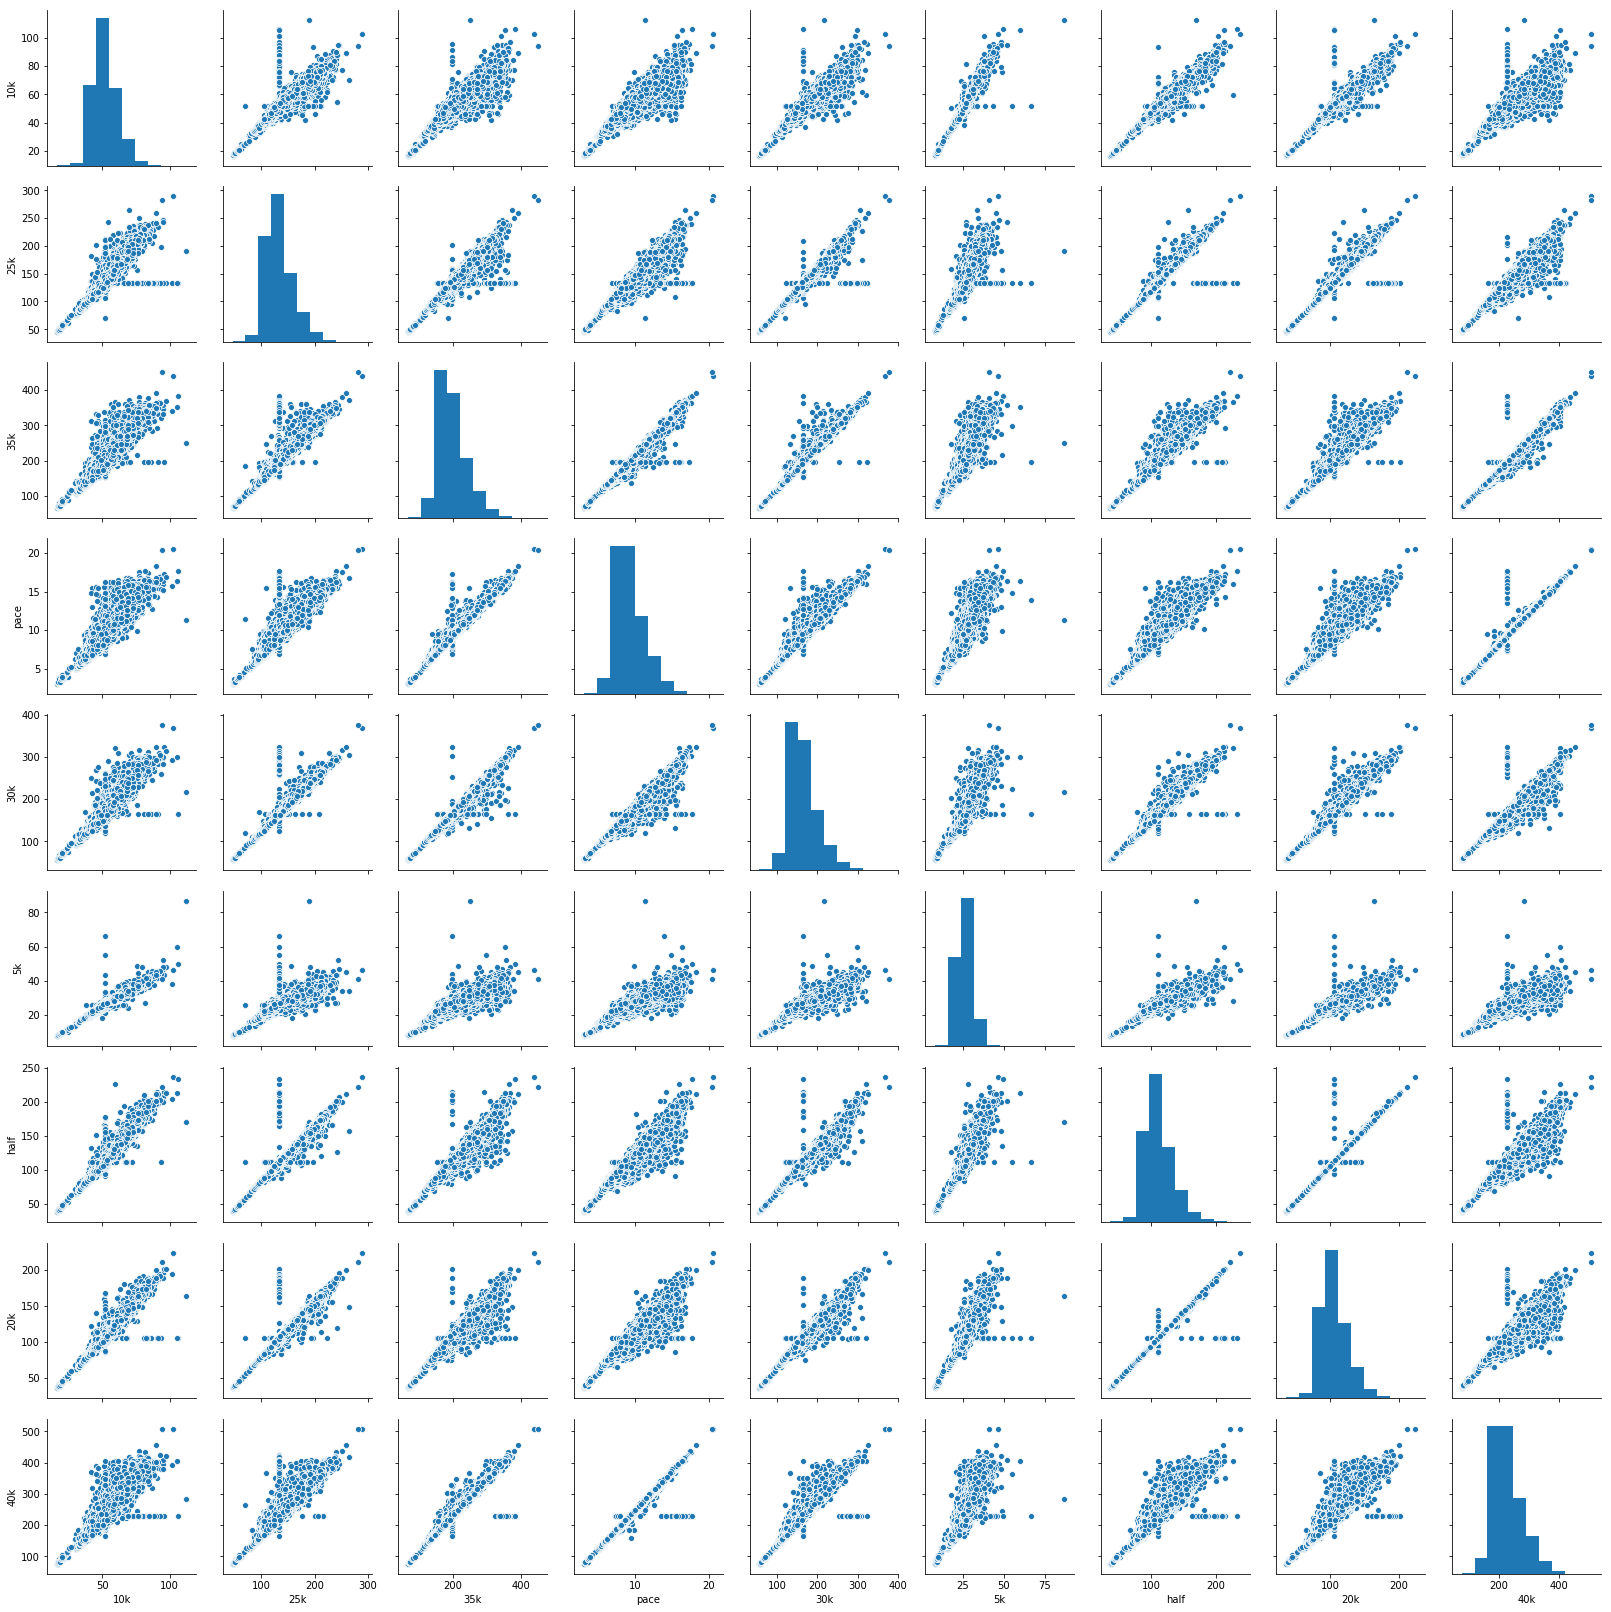

In [36]:
sns.pairplot(features)

In [42]:
# Normalize Data
#x_norm = normalize(features)

# Create PCAs for all distance interval
x_pca = PCA(3).fit_transform(features)
dfx_pca = pd.DataFrame(data=x_pca, columns=['PCA1', 'PCA2', 'PCA3'])
x_pca = dfx_pca.values

dfx_pca.head()

,PCA1,PCA2,PCA3
0,-259.492392,15.151135,3.453984
1,-162.990446,2.648166,2.150732
2,-266.647139,14.782877,3.271455
3,-162.486957,3.174566,1.952285
4,-265.340899,14.298981,3.242546


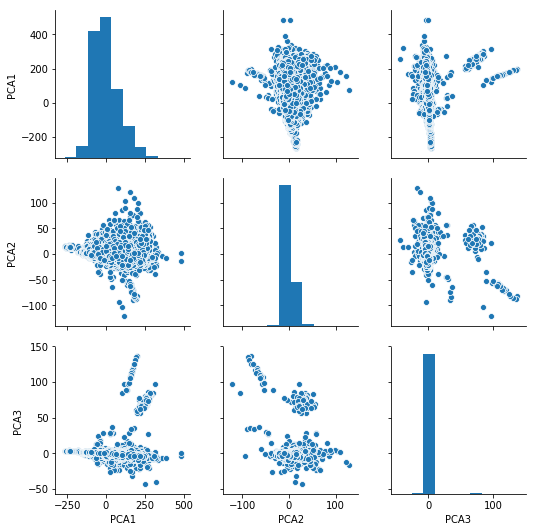

In [43]:
sns.pairplot(dfx_pca)

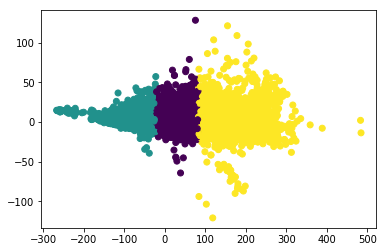

In [44]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(x_pca)

# Plot the solution.
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
#print('Comparing k-means clusters against the data:')
#print(pd.crosstab(y_pred, y))

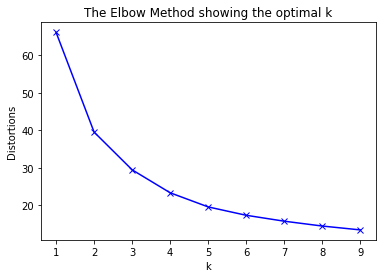

In [45]:
# Create list of distortions for each K value
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x_pca)
    kmeanModel.fit(x_pca)
    distortions.append(sum(np.min(cdist(x_pca, kmeanModel.cluster_centers_, 'euclidean'), axis=1))/ X.shape[0])

# plot the Elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [46]:
# Labels

# Calculate predicted values.
kmeans = KMeans(n_clusters=3, random_state=42).fit(x_pca)

kmeans.labels_

features['Labels'] = kmeans.labels_

In [47]:
# Value counts
features.Labels.value_counts()

1    14905
0    11898
2     5180
Name: Labels, dtype: int64

- Predict Runner Type category
- Evaluate accuracy of model
- Create visualizations clusters and relationships that correspond with your prediction to tell a data story
- Write a Data Story